In [1]:
# import pandas and numpy
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# data 
data = pd.read_csv('Employee.csv')
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [3]:
# label proportion
data['LeaveOrNot'].value_counts()

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

In [4]:
# feature (X) and label (y)
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']

# data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.25,
                                                   random_state=42,
                                                   stratify=y)

In [5]:
# import library to convert data object to numeric
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [6]:
# processing 1
p1 = ColumnTransformer([
    ('oe',OrdinalEncoder(),['Education','Gender','EverBenched']),
    ('ohe',OneHotEncoder(),['City'])
], remainder='passthrough')
p1.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('oe', OrdinalEncoder(),
                                 ['Education', 'Gender', 'EverBenched']),
                                ('ohe', OneHotEncoder(), ['City'])])

In [7]:
# check
p1.transform(X_train)

array([[ 0.,  1.,  0., ...,  3., 30.,  1.],
       [ 2.,  1.,  0., ...,  3., 25.,  3.],
       [ 1.,  1.,  0., ...,  2., 24.,  2.],
       ...,
       [ 0.,  1.,  1., ...,  3., 26.,  4.],
       [ 0.,  1.,  0., ...,  3., 26.,  4.],
       [ 0.,  1.,  0., ...,  3., 26.,  4.]])

In [8]:
X_train_processed = p1.transform(X_train)
X_test_processed = p1.transform(X_test)

In [9]:
# algorithm model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [10]:
# choose model
for n,algo in zip(['K-Nerest Neighbors','Logistic Regression','Naive Bayes'],[KNeighborsClassifier(), LogisticRegression(), GaussianNB()]):
    model = algo.fit(X_train_processed, y_train)
    score_train = model.score(X_train_processed, y_train)
    score_test = model.score(X_test_processed, y_test)
    
    print(n)
    print(f'Score Train \t: ',score_train)
    print(f'Score Test \t: ',score_test)
    print()

K-Nerest Neighbors
Score Train 	:  0.8440813986815706
Score Test 	:  0.7792096219931272

Logistic Regression
Score Train 	:  0.7179707652622528
Score Test 	:  0.718213058419244

Naive Bayes
Score Train 	:  0.6993407853253081
Score Test 	:  0.7121993127147767



In [11]:
# param grid
param_grid = {'algo__n_neighbors' : list(range(1,50,2)),
              'algo__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# model tuning
from sklearn.pipeline import Pipeline
my_pipeline = Pipeline([
    ('pro',p1),
    ('algo',KNeighborsClassifier())
])

from sklearn.model_selection import GridSearchCV
model = GridSearchCV(estimator=my_pipeline,
                    param_grid=param_grid,
                    cv=4,
                    verbose=1)
model.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pro',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('oe',
                                                                         OrdinalEncoder(),
                                                                         ['Education',
                                                                          'Gender',
                                                                          'EverBenched']),
                                                                        ('ohe',
                                                                         OneHotEncoder(),
                                                                         ['City'])])),
                                       ('algo', KNeighborsClassifier())]),
             param_grid={'algo__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                             'brute'],
                         'algo__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                               19, 21, 23, 25, 27, 29, 31, 33,
                                               35, 37, 39, 41, 43, 45, 47,
                                               49]},
             verbose=1)

In [12]:
# score
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print(f'Score Train \t: ',score_train)
print(f'Score Test \t: ',score_test)

Score Train 	:  0.8288907996560619
Score Test 	:  0.7826460481099656


In [13]:
# best params
model.best_params_

{'algo__algorithm': 'brute', 'algo__n_neighbors': 7}

# Evaluasi Model

In [14]:
# data prediction
y_pred = model.predict(X_test)
y_pred[:5]

array([1, 0, 1, 0, 0], dtype=int64)

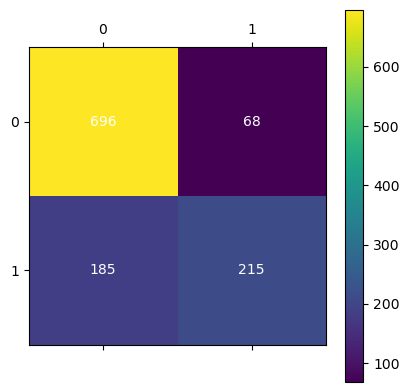

In [15]:
# report
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = matrix.ravel()

#visualization
import matplotlib.pyplot as plt
plt.matshow(matrix)

for (i, j), value in np.ndenumerate(matrix):
    plt.text(j, i, f'{value}', ha='center', va='center', color='white')

plt.colorbar()

In [20]:
(tn, fp, fn, tp)

(696, 68, 185, 215)

# Save Model

In [17]:
# dumping model
import pickle

In [18]:
pickle.dump(model,open('model/knn1.pkl','wb'))

In [22]:
pickle.dump((tn, fp, fn, tp), open('eval/eval_knn1.pkl','wb'))